# The total, available, and used memory of the system in a readable format like "GB" or "MB".

In [1]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Info", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}")
print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}")

======================================== Memory Info ========================================
Total: 12.67GB
Available: 11.54GB
Used: 774.63MB


# Import Files

In [2]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the DATA

In [4]:
# The path of data on drive
data_dir =  r'/gdrive/My Drive/Project 4/flowers'

# Load the data
data = load_files(data_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/gdrive/My Drive/Project 4/flowers'

# DATA Processing and Exploration

In [ ]:
# List the content of the Folder
folders = os.listdir(data_dir)
print(folders)

['rose', 'sunflower', 'daisy', 'dandelion', 'tulip']


# We have a folder for each flower class or type, and you want to load the data into two NumPy arrays:

- X: Filenames (training data)
- y: Flower names (target labels)

In [ ]:
X = np.array(data['filenames'])
y = np.array(data['target'])
labels = np.array(data['target_names'])

# Arrays
print('Data files - ',X)
print('Target labels - ',y)

Data files -  ['/gdrive/My Drive/Project 4/flowers/sunflower/7176729016_d73ff2211e.jpg'
 '/gdrive/My Drive/Project 4/flowers/dandelion/18385846351_3a2bf60427_n.jpg'
 '/gdrive/My Drive/Project 4/flowers/dandelion/98992760_53ed1d26a9.jpg'
 ...
 '/gdrive/My Drive/Project 4/flowers/dandelion/7184780734_3baab127c2_m.jpg'
 '/gdrive/My Drive/Project 4/flowers/sunflower/10386540106_1431e73086_m.jpg'
 '/gdrive/My Drive/Project 4/flowers/sunflower/164670176_9f5b9c7965.jpg']
Target labels -  [3 1 1 ... 1 3 3]


The numbers in the **Target labels as [3 1 1 ... 1 3 3]** are corresponding to class label. We need to change them to a vector of 5 elements (5 classes)

## Removing the .pyc or .py files from X and y:
- This loop iterates over the positions of .pyc or .py files found in the previous step.
- np.delete(X, pos) removes the elements at the specified positions from the array X.
- Similarly, np.delete(y, pos) removes the corresponding elements from the array y.

In [ ]:
# Remove .pyc or .py files
pyc_file_pos = (np.where(file==X) for file in X if file.endswith(('.pyc','.py')))
for pos in pyc_file_pos:
    X = np.delete(X,pos)
    y = np.delete(y,pos)

print('Number of training files : ', X.shape[0])
print('Number of training targets : ', y.shape[0])

Number of training files :  4317
Number of training targets :  4317


# Loading the Images

## Converts a list of image file paths into an array of image data, resizes the images, and prints the shape of the resulting array and the first training item. The steps include:
- Importing necessary functions from Keras:
- Defining the convert_img_to_arr function:
- Converting the list of image arrays to a NumPy array:
- Printing the shape of the array and the first training item:

In [ ]:
from keras.preprocessing.image import img_to_array, load_img
import numpy as np

def convert_img_to_arr(file_path_list):
    arr = []
    #size=64,64
    img_width, img_height = 150, 150
    for file_path in file_path_list:
        img = load_img(file_path, target_size=(img_width, img_height))
        img = img_to_array(img)
        arr.append(img)
        #arr.append(cv2.resize(img,size))
    return arr

X = np.array(convert_img_to_arr(X))
print(X.shape)
print('First training item : ', X[0])

(4317, 150, 150, 3)
First training item :  [[[101. 114.   8.]
  [ 33.  38.  18.]
  [ 23.  29.  15.]
  ...
  [  1. 102. 190.]
  [  4. 103. 188.]
  [ 13.  74. 128.]]

 [[ 31.  39.  15.]
  [ 23.  32.  15.]
  [ 23.  27.  12.]
  ...
  [  0.  47. 106.]
  [  8.  72. 116.]
  [ 24.  77. 121.]]

 [[ 54.  62.  15.]
  [ 28.  32.  17.]
  [ 29.  32.  21.]
  ...
  [  0.  55. 103.]
  [  5.  34.  66.]
  [  5.  31.  64.]]

 ...

 [[ 99.  96.  27.]
  [ 82.  84.  21.]
  [ 72.  68.  33.]
  ...
  [ 94. 112. 134.]
  [ 88. 101. 118.]
  [ 78.  89. 107.]]

 [[114. 107.  17.]
  [109.  99.  40.]
  [108.  84.  60.]
  ...
  [ 87. 105. 129.]
  [ 83. 103. 130.]
  [ 86.  97. 115.]]

 [[166. 157.  56.]
  [130. 112.  36.]
  [184. 178.  28.]
  ...
  [ 32.  32.  30.]
  [ 64.  75.  81.]
  [ 83.  95. 117.]]]


## **Key Points:**
- The shape of training data is (4317, 150, 150, 3)
- 4317 is the number of training items or files
- (150,150) is the target size or image size provided while loading image
- 3 refers to the depth for colored images ( RGB channels )

# Have a look at some beautiful Flower Images

Data type of X: float32
Min value in X: 0.0
Max value in X: 255.0
Labels: [3 1 1 0 4]
Corresponding folder names: ['dandelion', 'sunflower', 'sunflower', 'rose', 'tulip']
Shape of first image: (150, 150, 3)


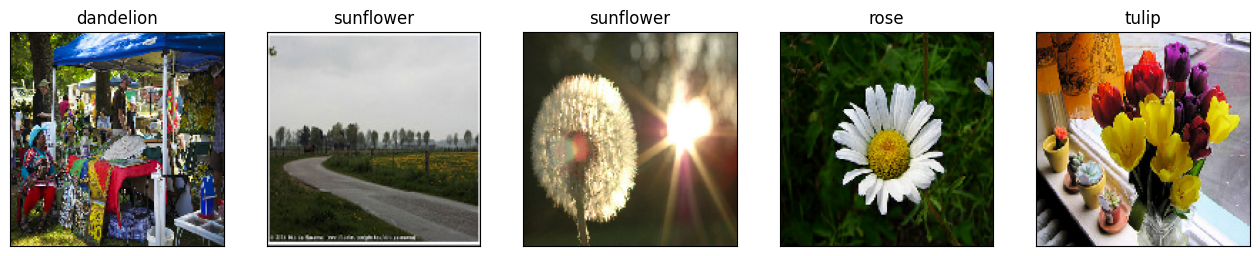

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Debugging: Check data type and range
print(f"Data type of X: {X.dtype}")
print(f"Min value in X: {X.min()}")
print(f"Max value in X: {X.max()}")

# Debugging: Check label indexing
print(f"Labels: {y[:5]}")
print(f"Corresponding folder names: {[folders[label] for label in y[:5]]}")

# Debugging: Check image shape
print(f"Shape of first image: {X[0].shape}")

fig = plt.figure(figsize=(16, 9))
for i in range(5):
    ax = fig.add_subplot(1, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(X[i].astype(np.uint8))
    ax.set_title(folders[y[i]])
plt.show()